In [ ]:
#Install dependencies
!pip install pytrends

In [ ]:
!pip install cryptory

  Created wheel for cryptory: filename=cryptory-0.1.1-cp37-none-any.whl size=9191 sha256=ae218adb4eb689d6a140ee8455c8f1fbaf6589d2c58644f9707e7a30fbc9eddd
  Stored in directory: /root/.cache/pip/wheels/ec/b4/6f/6ae72a8dc1ca028c78d88b90381b34166b2b6d61c99349bf4c
Successfully built cryptory


In [ ]:
from cryptory import Cryptory
import pandas as pd

In [ ]:
# initialise object 
# pull data from start of month (March) to present day

my_cryptory = Cryptory(from_date = "2021-03-01")

In [ ]:
import pandas_datareader as pdr
import numpy as np

In [ ]:
# Use Yahoo finance API to get ticker prices
# Select tickers that track cryptocurrency

all_stocks_df = pdr.get_data_yahoo('RIOT', start='2021-03-01')
# stocks of interest
stocks = ["RIOT", "MARA"]
for stock in stocks[1:]:
    all_stocks_df = all_stocks_df.merge(pdr.get_data_yahoo(stock, start='2021-03-01'),how="left",left_index=True, right_index=True)

In [ ]:
#REview the data
all_stocks_df.head()

,High_x,Low_x,Open_x,Close_x,Volume_x,Adj Close_x,High_y,Low_y,Open_y,Close_y,Volume_y,Adj Close_y
Date,,,,,,,,,,,,
2021-03-01,53.810001,46.580002,49.040001,53.599998,26045400,53.599998,38.500000,32.330002,34.220001,38.500000,22547300,38.500000
2021-03-02,57.020000,48.500000,57.000000,49.099998,23287700,49.099998,40.000000,34.669998,40.000000,34.889999,17134000,34.889999
2021-03-03,55.279999,48.599998,55.139999,49.570000,21616300,49.570000,38.450001,34.830002,38.110001,36.619999,18378800,36.619999
2021-03-04,49.000000,41.330002,47.400002,44.290001,19960900,44.290001,36.200001,28.500000,34.349998,32.009998,20759800,32.009998
2021-03-05,45.250000,34.250000,44.990002,40.299999,27559900,40.299999,32.880001,24.110001,32.400002,30.030001,24155200,30.030001


In [ ]:
# Use only the closing price
stocks_df = all_stocks_df.iloc[:,[3,9]]
                               
stocks_df.columns = ["RIOT", "MARA"]                              

In [ ]:
stocks_df.reset_index(inplace=True)

stocks_df.head()

,Date,RIOT,MARA
0,2021-03-01,53.599998,38.500000
1,2021-03-02,49.099998,34.889999
2,2021-03-03,49.570000,36.619999
3,2021-03-04,44.290001,32.009998
4,2021-03-05,40.299999,30.030001


In [ ]:
# Obtain the Cryptocurrency prices for comparison

import seaborn as sns
import matplotlib.pyplot as plt

all_coins_df = my_cryptory.extract_bitinfocharts("btc")
# coins of interest
bitinfocoins = ["btc", "eth"]
for coin in bitinfocoins[1:]:
    all_coins_df = all_coins_df.merge(my_cryptory.extract_bitinfocharts(coin), on="date", how="left")

In [ ]:
#Merge both stocks and Cryto tokens by their dates for correlation
stocks_crypto = stocks_df.merge(all_coins_df, left_on='Date', right_on='date', how ='inner')

# Additional date column is not need for upcoming calculations
stocks_crypto = stocks_crypto.drop('date', axis=1)

stocks_crypto.tail(7)


,Date,RIOT,MARA,btc_price,eth_price
15,2021-03-22,56.009998,39.990002,56805.0,1766.0
16,2021-03-23,50.119999,38.040001,54699.0,1692.0
17,2021-03-24,45.709999,34.040001,55203.0,1680.0
18,2021-03-25,48.169998,34.200001,52126.0,1592.0
19,2021-03-26,48.220001,36.090000,53220.0,1640.0
20,2021-03-29,47.889999,38.130001,56908.0,1756.0
21,2021-03-30,51.509998,44.139999,58671.0,1840.0


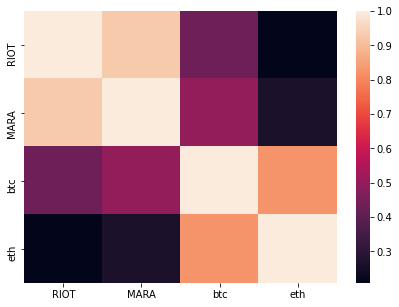

In [ ]:
#Drop the Date to run the correlation heat map
stocks_trend = stocks_crypto.drop('Date', axis=1)

corr = stocks_trend.pct_change().corr(method='pearson')
fig, ax = plt.subplots(figsize=(7,5))

sns.heatmap(corr, 
            xticklabels=[col.replace("_price", "") for col in corr.columns.values],
            yticklabels=[col.replace("_price", "") for col in corr.columns.values],
            annot_kws={"size": 16})
plt.show()

In [1]:
#Stock ticker RIOT is less correlated to BTC. Price changes in the future could be forecast with the H2O.ai AutoML package/framework

#Install JVM for framework
!apt-get install openjdk-8-jdk -qq > /dev/null

In [2]:
!pip install h2o -qq

     |████████████████████████████████| 164.8MB 78kB/s 


In [20]:
#Use a 7 day time interval and API Key for the RIOT ticker forecast with more data points
import os
from datetime import datetime

# Make sure you obtain a key from their site
os.environ["ALPHAVANTAGE_API_KEY"] = "APIKEY_PROVIDED_FHJ"

import pandas_datareader.data as web

In [4]:
f = web.DataReader("RIOT", "av-intraday", start=datetime(2021, 3, 24),end=datetime(2021, 4, 1), api_key=os.getenv('ALPHAVANTAGE_API_KEY'))

In [5]:
#Using the Alpha Vantage key after registering on their site provides the following dataframe
f.head()


,open,high,low,close,volume
2021-03-24 04:01:00,52.25,52.80,52.25,52.80,1881
2021-03-24 04:02:00,52.81,53.25,52.81,53.25,2264
2021-03-24 04:03:00,54.00,54.00,53.75,53.75,1633
2021-03-24 04:04:00,53.45,53.45,52.80,53.00,1226
2021-03-24 04:05:00,53.00,53.00,53.00,53.00,607


In [6]:
# By using the closing price and volume you create lagged features by day to input into the model

df=f[['close','volume']]

num_lags=10
for lag in range(3, num_lags + 1):
    df['lag_' + str(lag)] = df.close.shift(lag)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [7]:
# Drop the null values from the time lagged features added to the dataframe as well as the volume since the forecast is for closing price

df=df.dropna()
df_processed = df.drop(columns='volume')
# Create the processed dataframe without the closing price and reset index
df_processed.reset_index(drop=True,inplace=True)

df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4645 entries, 0 to 4644
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   4645 non-null   float64
 1   lag_3   4645 non-null   float64
 2   lag_4   4645 non-null   float64
 3   lag_5   4645 non-null   float64
 4   lag_6   4645 non-null   float64
 5   lag_7   4645 non-null   float64
 6   lag_8   4645 non-null   float64
 7   lag_9   4645 non-null   float64
 8   lag_10  4645 non-null   float64
dtypes: float64(9)
memory usage: 326.7 KB


In [8]:
#Use df_processed to create the test and train dataframes for the H2O ML model based on the prior time series interval

df_train = df_processed.loc[:int(df_processed.shape[0]*0.8),:]
df_test = df_processed.loc[int(df_processed.shape[0]*0.8):,:]

In [9]:
# Import H2O libraries and Matplot Libraries for plotting the forecasting results

import pandas as pd
import h2o
from h2o.automl import H2OAutoML

import matplotlib.pyplot as plt
from scipy import stats


%matplotlib inline

In [10]:
#Start the H2O instance that runs on the JVM

h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.10" 2021-01-19; OpenJDK Runtime Environment (build 11.0.10+9-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.10+9-Ubuntu-0ubuntu1.18.04, mixed mode)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpn7p8vfm6
  JVM stdout: /tmp/tmpn7p8vfm6/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpn7p8vfm6/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.1
H2O_cluster_version_age:,9 days
H2O_cluster_name:,H2O_from_python_unknownUser_r7m58y
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [11]:
# Create the H2O frames from the dataframes for test and train

hf_train = h2o.H2OFrame(df_train)
hf_test = h2o.H2OFrame(df_test)

hf_train.describe()

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Rows:3717
Cols:9




,close,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10
type,real,real,real,real,real,real,real,real,real
mins,37.82,37.82,37.82,37.82,37.82,37.82,37.82,37.82,37.82
mean,48.41447481840192,48.415919531880625,48.41630425073986,48.416810034974525,48.41715439870861,48.4175175948345,48.41816058649448,48.41871614205019,48.41914390637617
maxs,55.6199,55.6199,55.6199,55.6199,55.6199,55.6199,55.6199,55.6199,55.6199
sigma,3.0262641857333414,3.0281841363432815,3.0286986263403666,3.029385666773124,3.0298339745783736,3.030302488898132,3.031180450893075,3.031876851295003,3.0323829000715707
zeros,0,0,0,0,0,0,0,0,0
missing,0,0,0,0,0,0,0,0,0
0,53.4,53.3,53.18,53.47,53.0,53.0,53.75,53.25,52.8
1,53.4,53.3,53.3,53.18,53.47,53.0,53.0,53.75,53.25
2,53.5,53.4,53.3,53.3,53.18,53.47,53.0,53.0,53.75


In [12]:
y = 'close'
X = hf_train.columns
X.remove(y)

#Show features
X

['lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7', 'lag_8', 'lag_9', 'lag_10']

In [13]:
# Run the AutoML function in H2O to find the best performing  ML model

aml = H2OAutoML(max_runtime_secs = 60,
                seed = 42)
aml.train(x = X, 
          y = y,
          training_frame = hf_train,
          leaderboard_frame = hf_test)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [14]:
#Check the leaderboard for the performance of the various models
lb = aml.leaderboard

lb

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
GLM_1_AutoML_20210404_155556,0.0634613,0.251915,0.0634613,0.179937,0.004773
XGBoost_grid__1_AutoML_20210404_155556_model_1,0.0783936,0.279989,0.0783936,0.201402,0.00530175
XGBoost_grid__1_AutoML_20210404_155556_model_2,0.0786883,0.280514,0.0786883,0.20552,0.00531309
XGBoost_grid__1_AutoML_20210404_155556_model_3,0.0810122,0.284626,0.0810122,0.206664,0.00538784
XGBoost_3_AutoML_20210404_155556,0.082149,0.286617,0.082149,0.201171,0.00543622
XGBoost_2_AutoML_20210404_155556,0.0933609,0.30555,0.0933609,0.222661,0.0057843
DeepLearning_grid__1_AutoML_20210404_155556_model_1,0.101253,0.318203,0.101253,0.21925,0.00603512
DeepLearning_1_AutoML_20210404_155556,0.109988,0.331644,0.109988,0.244213,0.00625275
XRT_1_AutoML_20210404_155556,0.110761,0.332808,0.110761,0.248535,0.00629595
DRF_1_AutoML_20210404_155556,0.143665,0.379032,0.143665,0.277512,0.00718988


In [15]:
#Use the Linear model to run the prediction
leader_model = aml.leader
hf_test_predict = leader_model.predict(hf_test)

glm prediction progress: |████████████████████████████████████████████████| 100%


In [16]:
# You will get the test dataset predictions into a dataframe to plot

df_results = pd.DataFrame()
df_results['ground_truth'] = df_test['close'].reset_index(drop=True)

In [17]:
# Get the H2O predictions into the same dataframe for comparison
df_results['predictions'] = h2o.as_list(hf_test_predict,use_pandas=True)
df_results.head()

,ground_truth,predictions
0,51.610,51.733417
1,51.550,51.611345
2,51.530,51.445157
3,51.735,51.557756
4,51.530,51.520235


In [18]:
# You can also get the R2 value for the same test dataset
slope, intercept, r_value, p_value, std_err = stats.linregress(x=df_results['predictions'],y=df_results['ground_truth'])
print('R2 = ',r_value*r_value)

R2 =  0.972055001566314


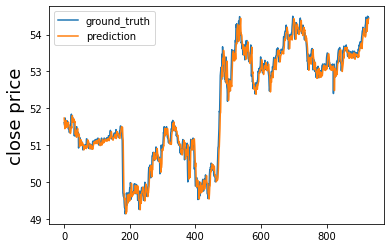

In [19]:
#Plot the results for the dataframe
plt.plot(df_results['ground_truth'])
plt.plot(df_results['predictions'])
plt.ylabel('close price',fontsize=18)
plt.legend(['ground_truth','prediction'])
plt.show()